### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('./coupons.csv')

In [4]:
data.head()
print(data.size)
data.dtypes

329784


destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

2. Investigate the dataset for missing or problematic data.

In [5]:
data.isnull().sum().sort_values()


destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#data = dat.drop(columns=['car'])
data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data['direction_same'].fillna(data['direction_same'].mode()[0])
data['direction_opp'].fillna(data['direction_opp'].mode()[0])
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])


0        never
1        never
2        never
3        never
4        never
         ...  
12679    never
12680    never
12681    never
12682    never
12683    never
Name: CoffeeHouse, Length: 12684, dtype: object

4. What proportion of the total observations chose to accept the coupon?



In [7]:

data["Y"].mean()


0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

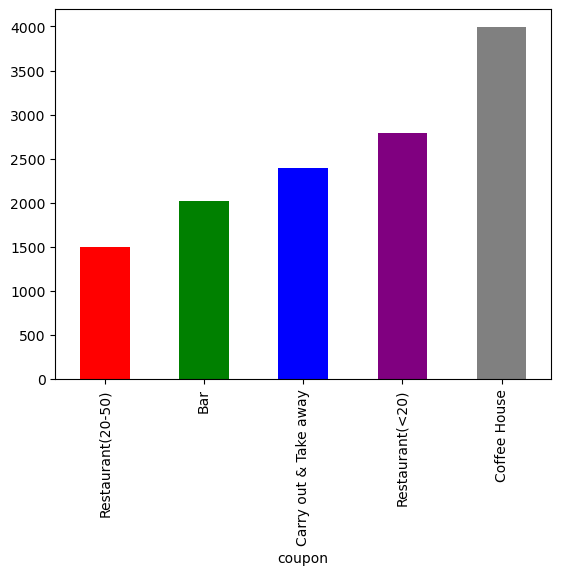

In [255]:
colors = ['red', 'green', 'blue', 'purple','grey']
# this is a simple pandas bar plot.
data.groupby(by="coupon")[['coupon']].value_counts().sort_values().plot.bar(color=colors)
# we can use sns/marplot libs for more sophisticasted features.


6. Use a histogram to visualize the temperature column.

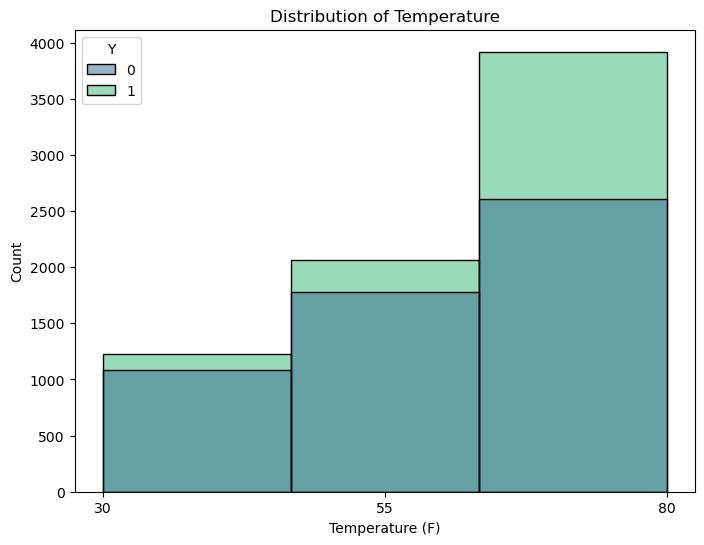

In [261]:
#basic option
#data['temperature'].hist()

#more sophisticated representation
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='temperature', bins=3, kde=False, palette='viridis', hue='Y')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.xticks([30, 55, 80]) # Set explicit ticks for clarity based on description
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
# with query
#data_bar_coupons=data.query('coupon=="Bar"')

# with column selector.
data_bar_coupons=data[data['coupon']=="Bar"]
data_bar_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


<Axes: >

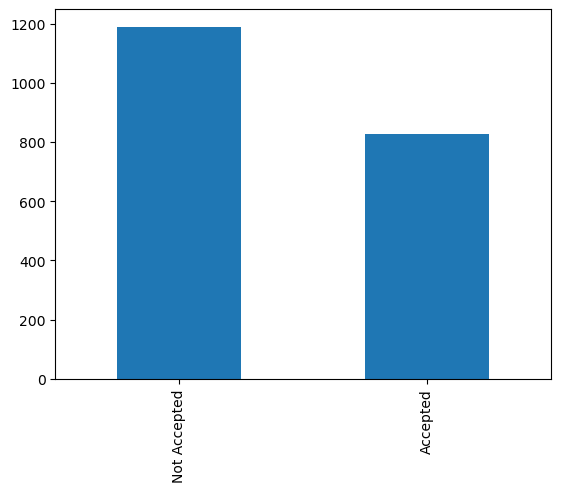

In [177]:

#using mean
#print(data_bar_coupons['Y'].mean())

# to plot it on chart, we need counts seperately.
acceptance_counts = data_bar_coupons['Y'].value_counts().sort_index();

#label columns
bar_acceptance_counts.index = ['Not Accepted', 'Accepted']

#plot the bar chart.
bar_acceptance_counts.plot(kind="bar")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


3 or less      0.768844
More than 3    0.647355
Name: Y, dtype: float64


<Axes: >

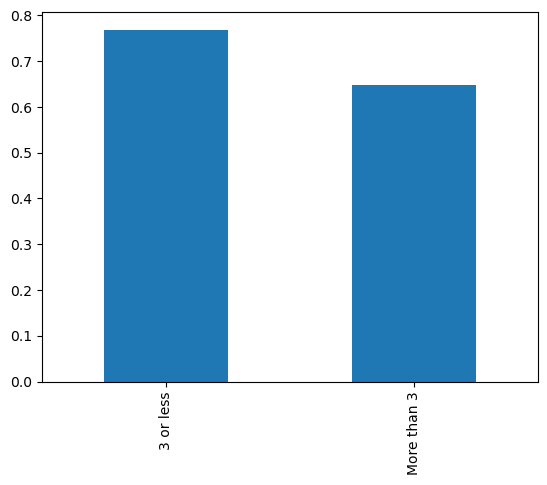

In [276]:
# store the values that represents drivers who went to bar 3 or fewer times
bar_less_than_three = ['never','less1','1~3']

#mark drivers who went to bar more than 3 and less than 3 times.
data_bar_coupons.loc[:,'num_times_bar_in_a_month'] = np.where(data_bar_coupons['Bar'].isin(bar_less_than_three), 'le_3','gt_3')

# group by acceptance and find out mean.
accepted_bar_lt_3=data_bar_coupons.groupby('num_times_bar_in_a_month')['Y'].mean()

#add index.
accepted_bar_lt_3.index=["3 or less", "More than 3"]

#just see values
print(accepted_bar_lt_3)

#plot the bar.
accepted_bar_lt_3.plot(kind="bar")


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


                                 Y
All Others                0.335003
Bar > 1/month & Age > 25  0.695238
Difference in acceptance rate: -0.3602

There appears to be a difference in acceptance rates between the two groups.


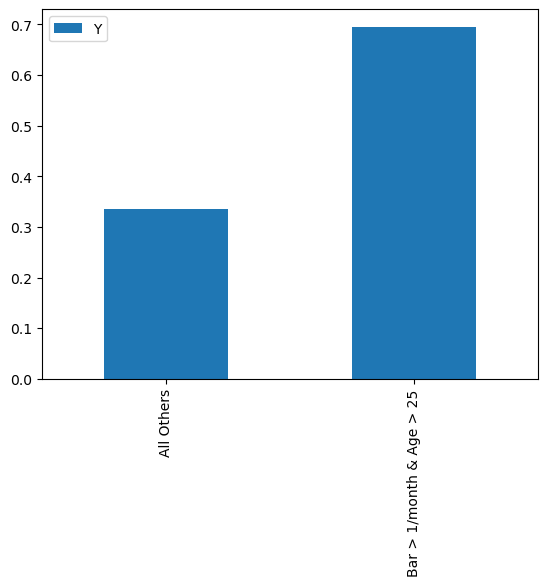

In [11]:
bar_more_than_once = ['1~3','4~8','gt8']
# Identify who goes to bar more than once and over 25 mark it as Y or N on a new column
data_bar_coupons.loc[:,'bar_mt_1_over_25']=np.where(data_bar_coupons["Bar"].isin(bar_more_than_once)
                                            &~data_bar_coupons["age"].isin(["21","below21"]),'Y','N')
#Since this is object convert it to string
data_bar_coupons.loc[:,'bar_mt_1_over_25']=data_bar_coupons['bar_mt_1_over_25'].apply(str)

# group by and see counts
bar_gt_1_above_25=data_bar_coupons.groupby('bar_mt_1_over_25')[['Y']].mean()


#rename columns for better depeicture
bar_gt_1_above_25.index=['All Others','Bar > 1/month & Age > 25']

print(bar_gt_1_above_25)

#plot the graph.
bar_gt_1_above_25.plot(kind="bar")

group1_acceptance = pd.to_numeric(bar_gt_1_above_25.loc['All Others'].iloc[0])
group2_acceptance = pd.to_numeric(bar_gt_1_above_25.loc['Bar > 1/month & Age > 25'].iloc[0])


# Assess if there is a difference (visually or numerically)
# Based on the output and visualization, we can observe if there's a noticeable difference in the acceptance rates between the two groups.
# A statistical test (like a t-test or chi-squared test, depending on the data structure) could provide a more rigorous answer, but the prompt asks if there is a difference (implying a visual or numerical comparison is sufficient here).


difference = group1_acceptance - group2_acceptance
print(f"Difference in acceptance rate: {difference:.4f}")

# Based on the calculated difference, we can state whether there is a difference.
if abs(difference) > 0.01: # Define a small threshold for practical difference
    print("\nThere appears to be a difference in acceptance rates between the two groups.")
else:
    print("\nThere does not appear to be a significant difference in acceptance rates between the two groups based on this comparison.")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


                                 Y
All Others                0.377778
No_Kids_Farm_Fish_Forest  0.713249
Difference in acceptance rate: -0.3355

There appears to be a difference in acceptance rates between the two groups.


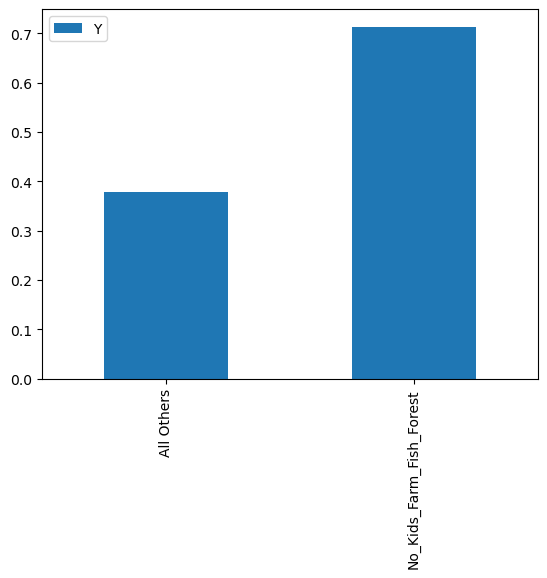

In [314]:
# Identify non kid passenger
data_bar_coupons.loc[:,"non_kids"]=np.where(data_bar_coupons["Bar"].isin(bar_more_than_once) &
                                            ~data_bar_coupons["passanger"].isin(["Kid(s)"]) &
                                            ~data_bar_coupons["occupation"].isin(["Farming Fishing & Forestry"]),
                                    'Y','N')	
data_bar_coupons[["non_kids","passanger","occupation"]]

# group by and see counts
bar_non_kids=data_bar_coupons.groupby('non_kids')[['Y']].mean()



#rename columns for better depeicture
bar_non_kids.index=['All Others','No_Kids_Farm_Fish_Forest']

print(bar_non_kids)

#plot the graph.
bar_non_kids.plot(kind="bar")


# Assess if there is a difference (visually or numerically)
# Based on the output and visualization, we can observe if there's a noticeable difference in the acceptance rates between the two groups.
# A statistical test (like a t-test or chi-squared test, depending on the data structure) could provide a more rigorous answer, but the prompt asks if there is a difference (implying a visual or numerical comparison is sufficient here).
group1_acceptance = pd.to_numeric(bar_non_kids.loc['All Others'].iloc[0])
group2_acceptance = pd.to_numeric(bar_non_kids.loc['No_Kids_Farm_Fish_Forest'].iloc[0])


difference = group1_acceptance - group2_acceptance
print(f"Difference in acceptance rate: {difference:.4f}")

# Based on the calculated difference, we can state whether there is a difference.
if abs(difference) > 0.01: # Define a small threshold for practical difference
    print("\nThere appears to be a difference in acceptance rates between the two groups.")
else:
    print("\nThere does not appear to be a significant difference in acceptance rates between the two groups based on this comparison.")


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



0.7132486388384754
0.7217391304347827
0.6329113924050633


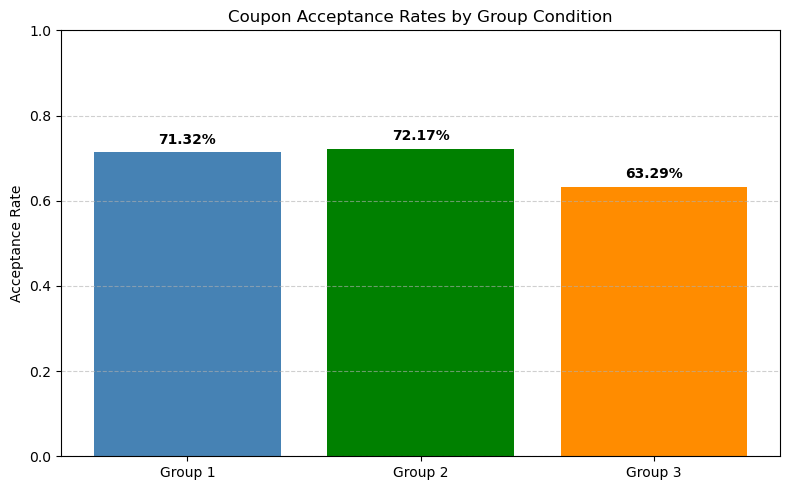

In [350]:
# Condition 1 - Identify go to bars more than once a month, had passengers that were not a kid, and were not widowed 
data_bar_coupons.loc[:,"group_1"]=np.where(data_bar_coupons["Bar"].isin(bar_more_than_once) &
                                               ~data_bar_coupons["passanger"].isin(["Kid(s)"]) &
                                                ~data_bar_coupons["maritalStatus"].isin(["Widowed"]),
                                            'Y','N')
      
#Condition 2 -  go to bars more than once a month and are under the age of 30 OR
data_bar_coupons.loc[:,"group_2"]=np.where(data_bar_coupons["Bar"].isin(bar_more_than_once) &
                                               data_bar_coupons["age"].isin(["below21","21","26"]),
                                            'Y','N')	


# Condition 3 - go to cheap restaurants more than 4 times a month and income is less than 50K.
incomes_below_50k = [
    'Less than $12500', '$12500 - $24999',
    '$25000 - $37499', '$37500 - $49999'
]
data_bar_coupons.loc[:,"group_3"]=np.where(data_bar_coupons["RestaurantLessThan20"].isin(["less1","1~3"]) &
                                               data_bar_coupons["income"].isin(incomes_below_50k),
                                            'Y','N')	

acceptance_ratio_group_1 = data_bar_coupons.groupby("group_1")["Y"].mean().get('Y', np.nan)
acceptance_ratio_group_2 = data_bar_coupons.groupby("group_2")["Y"].mean().get('Y', np.nan)
acceptance_ratio_group_3 = data_bar_coupons.groupby("group_3")["Y"].mean().get('Y', np.nan)

print(acceptance_ratio_group_1)
print(acceptance_ratio_group_2)
print(acceptance_ratio_group_3)

# Combine into a DataFrame for plotting
acceptance_rates = pd.DataFrame({
    'Group': ['Group 1', 'Group 2', 'Group 3'],
    'Acceptance Rate': [acceptance_ratio_group_1, acceptance_ratio_group_2, acceptance_ratio_group_3]
})

# Plot
plt.figure(figsize=(8, 5))
plt.bar(acceptance_rates['Group'], acceptance_rates['Acceptance Rate'], color=['steelblue', 'green', 'darkorange'])
plt.ylim(0, 1)
plt.title('Coupon Acceptance Rates by Group Condition')
plt.ylabel('Acceptance Rate')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add percentage labels
for i, rate in enumerate(acceptance_rates['Acceptance Rate']):
    plt.text(i, rate + 0.02, f'{rate:.2%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Apparently The drivers who goes to cheap restaurants more than 4 times a month and income is less than 50K are accepting less percentage compared to go to bars more than once a month and are under the age of 30 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

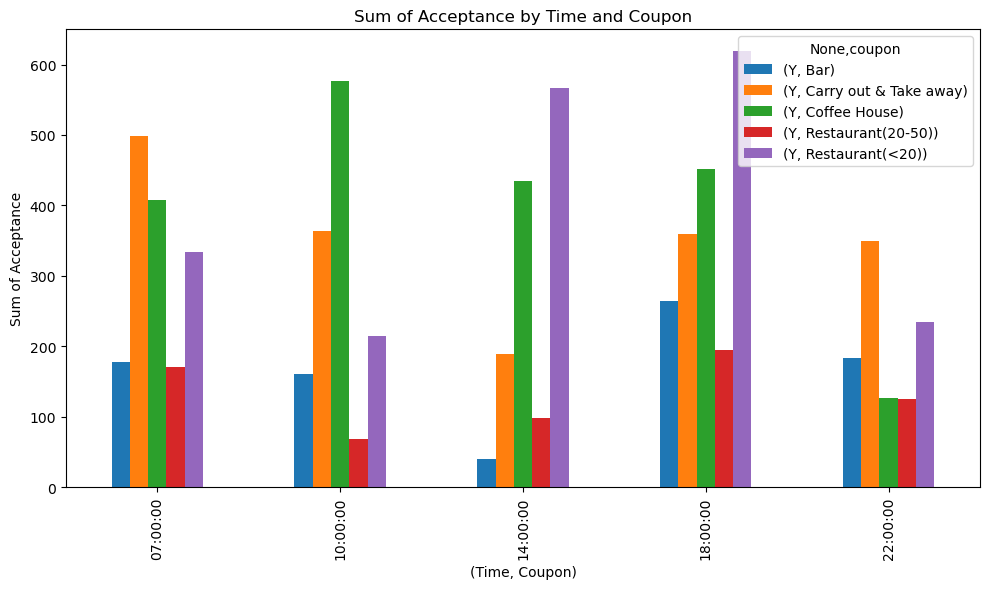

In [377]:
# One important dimension, what time the highest number of coupons got accepted and which caytegory
# For that we can group by time first and then by coupon ( category).
# The sum will give us the total number of coupons gets accepted at that time range for that category
plot_data=data.groupby(["time","coupon"])[["Y"]].sum().unstack()

#connvert the index which is in string format to time stamp , so we can sort.
df.index = pd.to_datetime(plot_data.index, format='%I%p').time

# sort it to show the bars in the time order.
df_sorted = df.sort_index(ascending=True)

#Best visualtion in this case is bar since we can easily figure out by bar height.
df_sorted.plot(kind='bar', figsize=(10, 6))

#set additional config option to make bar more readable.
plt.title('Sum of Acceptance by Time and Coupon')
plt.ylabel('Sum of Acceptance')
plt.xlabel('(Time, Coupon)')
plt.tight_layout()
# show the bar plot.
plt.show()


# Key Observation(s)
# 1. Most of the drivers appears to have accepted the coupons at "Economy" restaurants at 2PM and 6PM.
# 2. Coffe house seems to the most popular at all times except 10PM. with highest at 10AM (576) 
#   So better NOT to send coffe house coupomns at 10 PM
# 3. Suprisingly bar coupons are being accepted at 7AM. A possinbility to check outliers here?

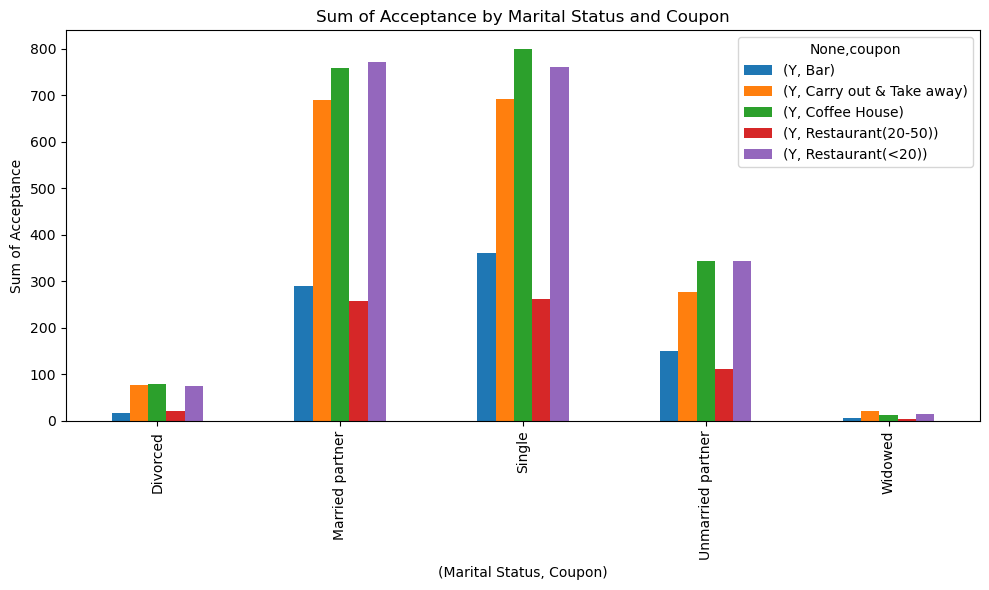

In [379]:
# Another interesting dimension to see by marital status. 
# who are accepting what and what type of coupons.

plot_data=data.groupby(["maritalStatus","coupon"])[["Y"]].sum().unstack()
#plot_data.head(50)
#Best visualtion in this case is bar since we can easily figure out by bar height.
plot_data.plot(kind='bar', figsize=(10, 6))

#set additional config option to make bar more readable.
plt.title('Sum of Acceptance by Marital Status and Coupon')
plt.ylabel('Sum of Acceptance')
plt.xlabel('(Marital Status, Coupon)')
plt.tight_layout()
# show the bar plot.
plt.show()

# Observations
# 1. Married partner and Singles appears to be accepting more coupons then Divorced and Widowed.
# 2. In this dimension also , expensive restaurants are NOT hot favorites.

/var/folders/mb/j2g896x179dcy7ghdww7zbh40000gn/T/ipykernel_10989/1511206542.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_co_coupons.loc[:,'cond_1']=np.where(data_co_coupons["CarryAway"].isin(carryout_more_than_once)


                    Y
All Others   0.727506
Dimension 1  0.739319
Difference in acceptance rate: -0.0118

There appears to be a difference in acceptance rates between the two groups.


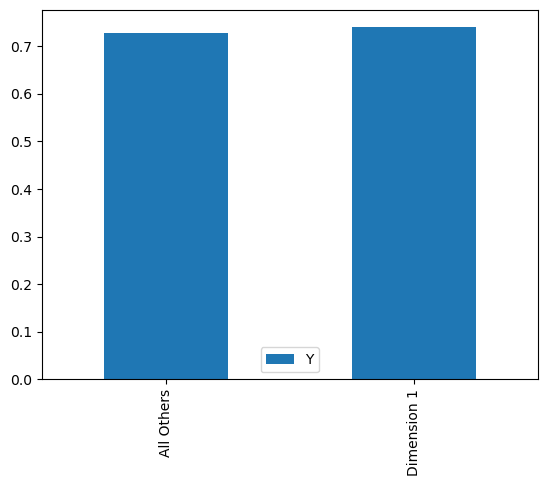

In [24]:
# Compare acceptance rate of those drivers who takes carry out more than 3 times and is married with children

#create a data frame for carry out coupons
data_co_coupons=data[data['coupon']=="Carry out & Take away"]

data_co_coupons.head()

carryout_more_than_once = ['1~3','4~8','gt8']
# Identify who goes takes carry out more than once and no urgent destination to go
# and has married partner and has children and mark as Y or N on a new column
data_co_coupons.loc[:,'cond_1']=np.where(data_co_coupons["CarryAway"].isin(carryout_more_than_once)
                                                   &data_co_coupons["destination"].isin(["No Urgent Place"])
                                                   &data_co_coupons["has_children"]==1
                                                   &data_co_coupons["maritalStatus"].isin(["Married partner"]),'Y','N')
#Since this is object convert it to string
data_co_coupons.loc[:,'cond_1']=data_co_coupons['cond_1'].apply(str)

# group by and see counts
cond_1=data_co_coupons.groupby('cond_1')[['Y']].mean()


#rename columns for better depeicture
cond_1.index=['All Others','Dimension 1']

print(cond_1)

#plot the graph.
cond_1.plot(kind="bar")

group1_acceptance = pd.to_numeric(cond_1.loc['All Others'].iloc[0])
group2_acceptance = pd.to_numeric(cond_1.loc['Dimension 1'].iloc[0])


# Assess if there is a difference (visually or numerically)
# Based on the output and visualization, we can observe if there's a noticeable difference in the acceptance rates between the two groups.
# A statistical test (like a t-test or chi-squared test, depending on the data structure) could provide a more rigorous answer, but the prompt asks if there is a difference (implying a visual or numerical comparison is sufficient here).


difference = group1_acceptance - group2_acceptance
print(f"Difference in acceptance rate: {difference:.4f}")

# Based on the calculated difference, we can state whether there is a difference.
if abs(difference) > 0.01: # Define a small threshold for practical difference
    print("\nThere appears to be a minor difference in acceptance rates between the two groups.")
else:
    print("\nThere does not appear to be a significant difference in acceptance rates between the two groups based on this comparison.")